In [94]:
import tensorflow as tf
from matplotlib.pyplot import figure
from tensorflow.keras import datasets, layers, models,constraints
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt
from scipy import interpolate
import pandas as pd
from matplotlib import pyplot as plt
from libs import archanjo as arch
import cv2
import matplotlib.pyplot as plt
import os
import cv2
# import cv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler

In [95]:
categorias = [0,1]
categorias_string = ["Hipertensos_Repouso_65_75_Supino","Saudaveis_Repouso_20_30_Supino"]

path_base = "/home/rafael/Documentos/FACOM/Mestrado/Materias/Defesa/Pesquisa/DSP/DataSet_VFC/New_Set/data/"

data_frame_cat = []
data_frame_numpy= []

for x in categorias:
    for class_data_dict in arch.coleta_dados(path_base + categorias_string[x]):
        name_user = class_data_dict[0]
        data = class_data_dict[1]
        sem_outliers = arch.removeoutlier(data.copy(), debug=False)
        estacionario = arch.select_estavel(sem_outliers)

        for data_ in estacionario:
            data_frame_cat.append(x)
            data_frame_numpy.append(data_[1])

data_frame_cat = np.array(data_frame_cat,dtype=np.int)
data_frame_numpy= np.array(data_frame_numpy,dtype=np.int)


In [96]:
rus = RandomUnderSampler(random_state=130,sampling_strategy = "majority"

)
train_images_balance_s,train_labels_balance_s, = rus.fit_resample(data_frame_numpy,data_frame_cat)


In [97]:

print(train_images_balance_s.shape)
print(train_labels_balance_s.shape)


(58, 256)
(58,)


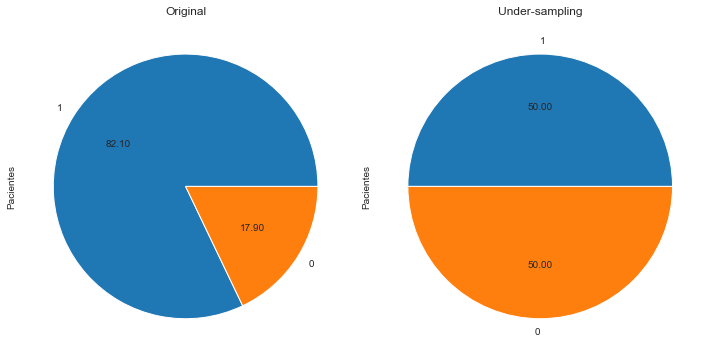

In [98]:
autopct = "%.2f"

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
axs[0].set_title("Original")
pd.Series(name='Pacientes',data=data_frame_cat).value_counts().plot.pie(autopct=autopct, ax=axs[0])

pd.Series(name='Pacientes',data=train_labels_balance_s).value_counts().plot.pie( autopct=autopct,ax=axs[1])

axs[1].set_title("Under-sampling")
fig.tight_layout()


In [99]:


train_images_balance, teste_images_predic, train_labels_balance, test_labels_predic = train_test_split(train_images_balance_s, train_labels_balance_s, shuffle=True, random_state=123, train_size=0.7   )
print(train_labels_balance)
print(test_labels_predic)

print(train_labels_balance.shape)
print(test_labels_predic.shape)

[0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1
 0 0 1]
[1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0]
(40,)
(18,)


In [100]:
data_x=[]
data_y=[]
value_list=64
for index_data in range(0,len(train_images_balance)):
    print(index_data)
    plot_list=arch.sintetiza_RR(train_images_balance[index_data],value_list=value_list,engine_value=100)
    for d_x in plot_list:
        # print("add")
        list_ciruclar=arch.get_circular(np.array(d_x))
        for ar_cl in list_ciruclar:
            fs = 4
            # rr_manual=arch.removeoutlier(ar_cl)
            x= np.linspace(0, len(ar_cl)-1, num=len(ar_cl), endpoint=True)
            f = interpolate.interp1d(x, ar_cl, kind='cubic')

            xnew = np.linspace(0, len(ar_cl)-1,num= len(ar_cl)*fs, endpoint=True)
            rr_interpolated = f(xnew)

            # _,transform_fourier_f,transform_fourier_magnitude = arch.frequency_domain(rr_interpolated,fs=4)

            # dat=arch.normalize(np.abs(np.log(transform_fourier_magnitude)),0,1)
            _,transform_fourier_f,transform_fourier_magnitude = arch.frequency_domain(rr_interpolated,fs=4)
            psd_f = interpolate.interp1d(transform_fourier_f,transform_fourier_magnitude)
            data_x.append(arch.normalize(psd_f(np.linspace(0.0,0.5,256)),0,1))
            # data_x.append(ar_cl)
            data_y.append(train_labels_balance[index_data])
#             # print("add")
#             # plt.subplot(111)
#             # plt.title("RR intervals")
#             # plt.plot(dat, color="k", markerfacecolor="#A651D8", markeredgewidth=0, marker="o", markersize=8)
#             # plt.xlabel("Time (s)")
#             # plt.ylabel("RR-interval (ms)")
#             # plt.title("Interpolated")
#             # # plt.gca().set_xlim(0, 256)
#             # plt.show()
#     #         break
#     #     break
#     # break
train_images_balance = np.array(data_x)
train_labels_balance = np.array(data_y)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [101]:
data_x=[]
data_y=[]
value_list=64
for index_data in range(0,len(teste_images_predic)):
    print(index_data)
    fs = 4
    rr_manual=teste_images_predic[index_data]
    x= np.linspace(0, len(rr_manual)-1, num=len(rr_manual), endpoint=True)
    f = interpolate.interp1d(x, rr_manual, kind='cubic')
    xnew = np.linspace(0, len(rr_manual)-1,num= len(rr_manual)*fs, endpoint=True)
    rr_interpolated = f(xnew)
    _,transform_fourier_f,transform_fourier_magnitude = arch.frequency_domain(rr_interpolated,fs=4)
    psd_f = interpolate.interp1d(transform_fourier_f,transform_fourier_magnitude)
    data_x.append(arch.normalize(psd_f(np.linspace(0.0,0.5,256)),0,1))
    # data_x.append(arch.normalize(np.abs(np.log(transform_fourier_magnitude)),0,1))
    data_y.append(test_labels_predic[index_data])
teste_images_predic = np.array(data_x)
test_labels_predic = np.array(data_y)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [102]:
train_images, test_images, train_labels, test_labels = train_test_split(train_images_balance,train_labels_balance , shuffle=True, random_state=312, train_size=0.7)

In [136]:
train_images_conv1d =train_images.reshape(-1,16,16,1)
test_images_conv1d =test_images.reshape(-1,16,16,1)
teste_images_predic_conv1d=teste_images_predic.reshape(-1,16,16,1)


In [134]:
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(16, 16, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2,activation='softmax'))


In [128]:
model = models.Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(256,1)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=64, kernel_size=5, activation='relu'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Conv1D(filters=64, kernel_size=5, activation='relu'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Conv1D(filters=64, kernel_size=5, activation='relu'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Conv1D(filters=64, kernel_size=5, activation='relu'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Conv1D(filters=64, kernel_size=5, activation='relu'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Conv1D(filters=64, kernel_size=5, activation='relu'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Conv1D(filters=64, kernel_size=5, activation='relu'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Conv1D(filters=64, kernel_size=5, activation='relu'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
# model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
# model.add(layers.Dropout(0.2))
#
# model.add(layers.Conv1D(filters=16, kernel_size=3, activation='relu'))
# model.add(layers.Conv1D(filters=16, kernel_size=3, activation='relu'))
# # model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(0.2))
# model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [137]:
# model.fit(train_images_conv1d, train_labels, epochs=50, batch_size=129, verbose=1)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True),  metrics=['accuracy'])
#
history = model.fit(train_images_conv1d, train_labels, epochs=10,
                    validation_data=(test_images_conv1d, test_labels))


Epoch 1/10


/opt/anaconda/envs/RR/lib/python3.6/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


448/448 [==============================] - 6s 11ms/step - loss: 0.4759 - accuracy: 0.7800 - val_loss: 0.4335 - val_accuracy: 0.8019
Epoch 2/10
448/448 [==============================] - 4s 9ms/step - loss: 0.4042 - accuracy: 0.8211 - val_loss: 0.3667 - val_accuracy: 0.8394
Epoch 3/10
448/448 [==============================] - 4s 8ms/step - loss: 0.3347 - accuracy: 0.8485 - val_loss: 0.3300 - val_accuracy: 0.8685
Epoch 4/10
448/448 [==============================] - 3s 8ms/step - loss: 0.2785 - accuracy: 0.8759 - val_loss: 0.2417 - val_accuracy: 0.9053
Epoch 5/10
448/448 [==============================] - 5s 11ms/step - loss: 0.2354 - accuracy: 0.9004 - val_loss: 0.2068 - val_accuracy: 0.9235
Epoch 6/10
448/448 [==============================] - 3s 7ms/step - loss: 0.2092 - accuracy: 0.9144 - val_loss: 0.1919 - val_accuracy: 0.9303
Epoch 7/10
448/448 [==============================] - 4s 9ms/step - loss: 0.1875 - accuracy: 0.9239 - val_loss: 0.1638 - val_accuracy: 0.9451
Epoch 8/10
448/

In [138]:
y_pred = model.predict(teste_images_predic_conv1d)
y_pred_max = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_max)
print(test_labels_predic)
print(classification_report(test_labels_predic, y_pred_max))


[[8.03147827e-07 9.99999166e-01]
 [3.37485517e-07 9.99999642e-01]
 [9.98369515e-01 1.63052557e-03]
 [9.12704349e-01 8.72957036e-02]
 [9.99405742e-01 5.94225014e-04]
 [4.92214352e-01 5.07785678e-01]
 [8.40059221e-01 1.59940749e-01]
 [2.09627338e-09 1.00000000e+00]
 [9.99011517e-01 9.88448039e-04]
 [9.66128945e-01 3.38710845e-02]
 [5.62493384e-01 4.37506557e-01]
 [1.18966746e-04 9.99881029e-01]
 [1.25930733e-12 1.00000000e+00]
 [3.59790474e-02 9.64020967e-01]
 [6.09358788e-01 3.90641212e-01]
 [5.38486382e-03 9.94615138e-01]
 [1.06536038e-06 9.99998927e-01]
 [3.16421539e-01 6.83578491e-01]]
[1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1]
[1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0]
              precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.50      0.62      0.56         8

    accuracy                           0.56        18
   macro avg       0.56      0.56      0.56        18
weighted avg       0.57      0.56      0.56        18



In [108]:

from sklearn import svm, datasets,tree
from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# parameters = {'criterion':['gini', 'entropy'],
#               'splitter':['best', 'random'],
#               'min_samples_split':[2,5,10],
#               'min_samples_leaf':[1,5,10]}

# svc = svm.SVC()
# clf = tree.DecisionTreeClassifier()
# clf = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=parameters)
# X = train_images
# Y = train_labels
# clf = clf.fit(X, Y)

In [109]:
# print(clf.predict(teste_images_predic))
# print(test_labels_predic)

